In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r'C:\Users\icyde\OneDrive - Bellevue University\YEAR 2\SEMESTER 1\MATH\WEEK 10\qb_stats.csv'

In [3]:
data = pd.read_csv(file_path)

In [4]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [5]:
print("Columns in the dataset:\n", data.columns)

Columns in the dataset:
 Index(['name', 'team', 'games', 'att', 'cmp', 'comp_pct', 'yds', 'ypa', 'td',
       'int', 'sack', 'loss', 'rating'],
      dtype='object')


In [6]:
numeric_data = data.select_dtypes(include=[np.number])

In [7]:
numeric_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
mean_values = numeric_data.mean()
print("Mean of each numerical column:\n", mean_values)

Mean of each numerical column:
 games         14.125000
att          478.406250
cmp          306.562500
comp_pct      64.296875
yds         3515.062500
ypa            7.375000
td            22.375000
int           10.343750
sack          32.312500
loss         217.093750
rating        93.387500
dtype: float64


In [9]:
std_values = numeric_data.std()
print("Standard deviation of each numerical column:\n", std_values)

Standard deviation of each numerical column:
 games         2.406309
att         110.360366
cmp          68.929575
comp_pct      3.627537
yds         852.437489
ypa           0.796768
td            6.256609
int           5.839849
sack         10.514008
loss         70.786075
rating       11.054725
dtype: float64


In [10]:
yards_column = 'yds'

In [11]:
yards_data = numeric_data[yards_column].dropna()

In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

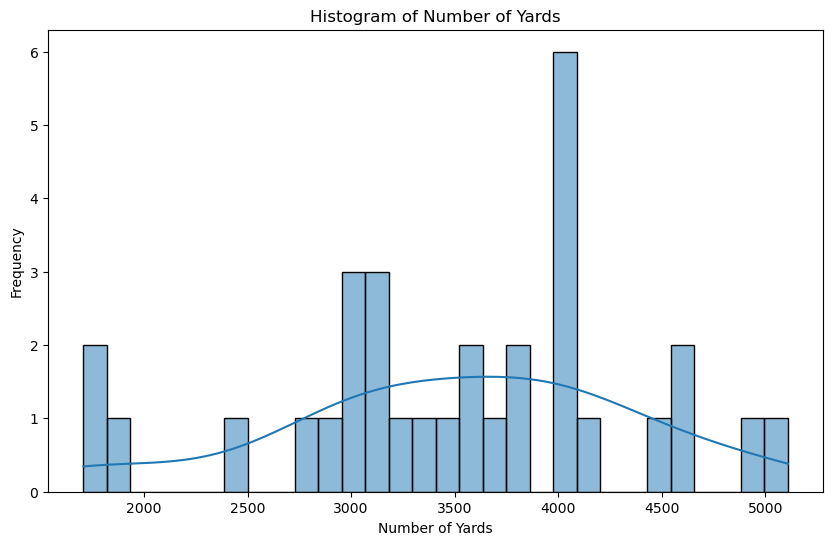

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(yards_data, bins=30, kde=True)
plt.title('Histogram of Number of Yards')
plt.xlabel('Number of Yards')
plt.ylabel('Frequency')
plt.show()

In [14]:
touchdowns_column = 'td' 

In [15]:
touchdowns_data = numeric_data[touchdowns_column].dropna()

Text(0.5, 0, 'Number of Touchdowns')

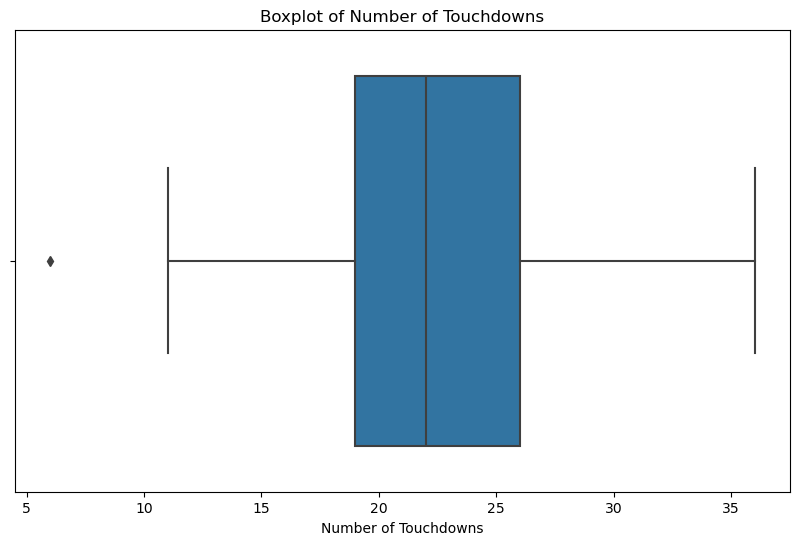

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=touchdowns_data)
plt.title('Boxplot of Number of Touchdowns')
plt.xlabel('Number of Touchdowns')

In [17]:
Q1 = numeric_data[touchdowns_column].quantile(0.25)
Q3 = numeric_data[touchdowns_column].quantile(0.75)
IQR = Q3 - Q1
outliers = numeric_data[(numeric_data[touchdowns_column] < Q1 - 1.5 * IQR) | (numeric_data[touchdowns_column] > Q3 + 1.5 * IQR)]
print("Outliers in number of touchdowns:\n", outliers)
plt.show()

Outliers in number of touchdowns:
     games    att    cmp  comp_pct     yds  ypa   td  int  sack   loss  rating
24    8.0  262.0  171.0      65.3  1822.0  7.0  6.0  5.0  26.0  194.0    85.1


In [18]:
file_path = r'C:\Users\icyde\OneDrive - Bellevue University\YEAR 2\SEMESTER 1\MATH\WEEK 10\survey_data.csv'

In [19]:
data = pd.read_csv(file_path)

In [20]:
data['hair_color'] = data['hair_color'].str.lower()
print(data['hair_color'].unique())

['brown' 'black' 'blonde' 'red' 'other' 'gray' 'white' 'blond']


In [21]:
total_students = len(data)
prob_brown_hair = len(data[data['hair_color'] == 'brown']) / total_students
print("Probability of a college student having brown hair:", prob_brown_hair)

Probability of a college student having brown hair: 0.5123456790123457


In [22]:
data['eye_color'] = data['eye_color'].str.lower()
print(data['eye_color'].unique())

['brown' 'blue' 'green' 'black' 'other']


In [23]:
total_students = len(data)
prob_blue_eyes = len(data[data['eye_color'] == 'blue']) / total_students
print("Probability of a college student having blue eyes:", prob_brown_hair)

Probability of a college student having blue eyes: 0.5123456790123457


In [24]:
prob_blue_eyes_given_brown_hair = len(data[(data['hair_color'] == 'brown') & (data['eye_color'] == 'blue')]) / len(data[data['hair_color'] == 'brown'])
print("Probability of a college student having blue eyes given that they have brown hair:", prob_blue_eyes_given_brown_hair)

Probability of a college student having blue eyes given that they have brown hair: 0.21686746987951808


In [25]:
prob_blue_eyes = len(data[data['eye_color'] == 'blue']) / len(data)
prob_brown_hair_given_blue_eyes = (prob_blue_eyes_given_brown_hair * prob_brown_hair) / prob_blue_eyes
print("Probability of a college student having brown hair given that they have blue eyes:", prob_brown_hair_given_blue_eyes)

Probability of a college student having brown hair given that they have blue eyes: 0.45000000000000007


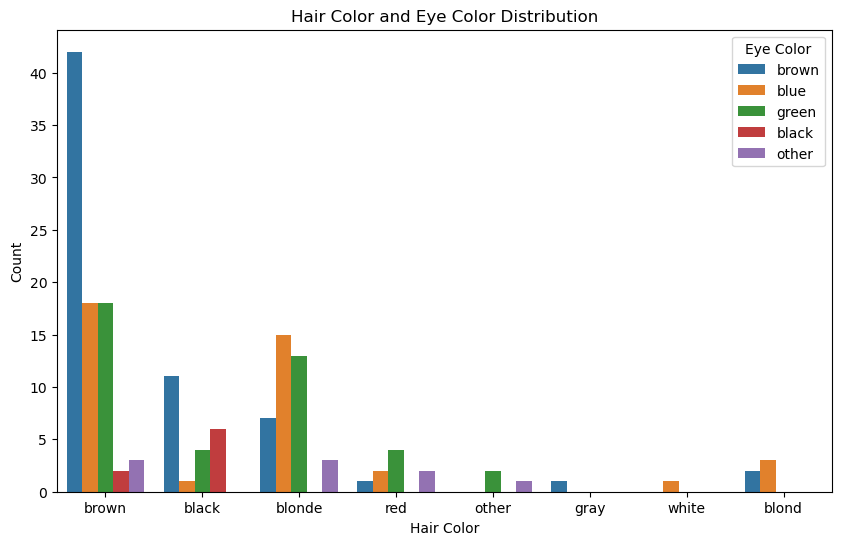

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='hair_color', hue='eye_color')
plt.title('Hair Color and Eye Color Distribution')
plt.xlabel('Hair Color')
plt.ylabel('Count')
plt.legend(title='Eye Color')
plt.show()